In [48]:
import pandas as pd 
import matplotlib.pyplot as plt 
customers=pd.read_csv(r"F:\Downloads\Customers.csv")
products=pd.read_csv(r"F:\Downloads\Products.csv")
transactions=pd.read_csv(r"F:\Downloads\Transactions.csv")

In [52]:
print("Customers Dataset Overview:")
print(customers.head(), customers.info(), customers.describe())

print("Products Dataset Overview:")
print(products.head(), products.info(), products.describe())

print("Transactions Dataset Overview:")
print(transactions.head(), transactions.info(), transactions.describe())

Customers Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 None        CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Law

In [ ]:
# Task 1: Exploratory Data Analysis (EDA) and Business Insights

In [54]:
data=transactions.merge(customers,on="CustomerID").merge(products,on="ProductID")

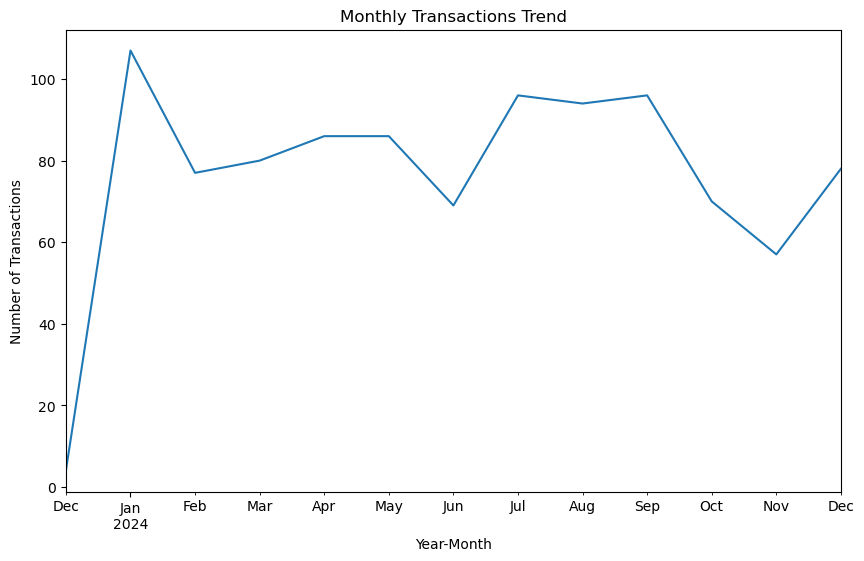

In [56]:
# 1.Distribution of transactions over time
data["TransactionDate"] = pd.to_datetime(data["TransactionDate"])
data["YearMonth"] = data["TransactionDate"].dt.to_period("M")
transaction_trend = data.groupby("YearMonth")["TransactionID"].count()
plt.figure(figsize=(10, 6))
transaction_trend.plot(kind="line", title="Monthly Transactions Trend")
plt.xlabel("Year-Month")
plt.ylabel("Number of Transactions")
plt.show()

C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_13584\650888448.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette="viridis")


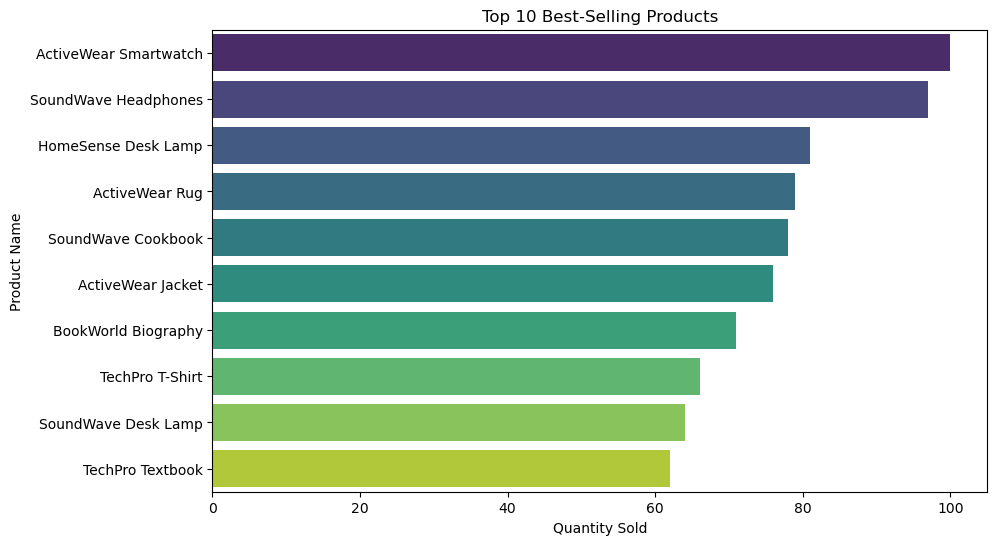

In [62]:
# 2.Top-selling products
top_products = data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_products.index, x=top_products.values, palette="viridis")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()

C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_13584\3415018261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="coolwarm")


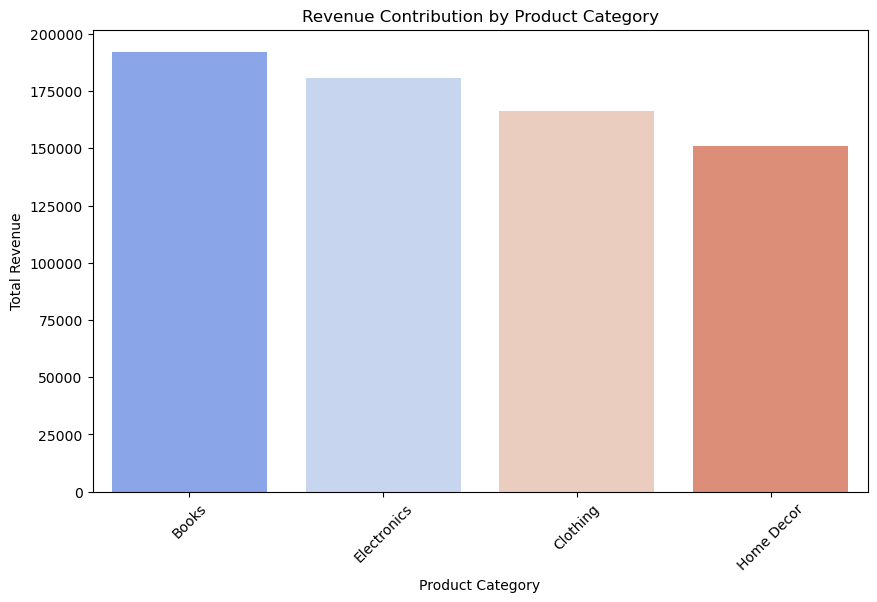

In [64]:
# 3.Revenue contribution by category
category_revenue = data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="coolwarm")
plt.title("Revenue Contribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_13584\3690725065.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_distribution.index, y=region_distribution.values, palette="mako")


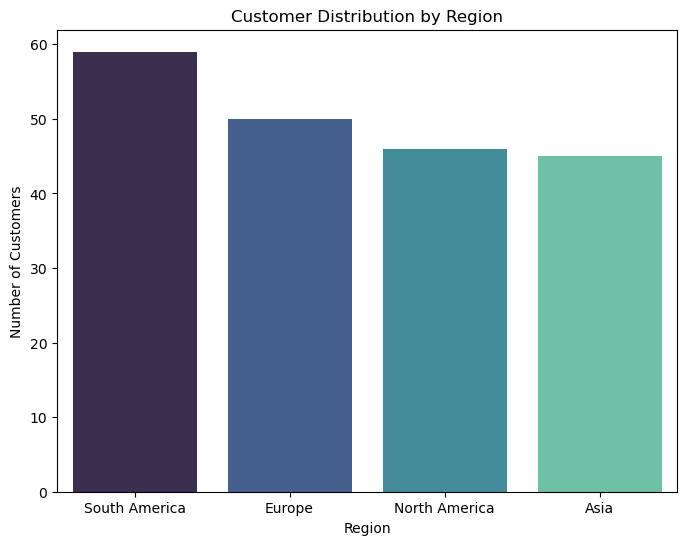

In [68]:
# 4. Region-wise customer distribution
region_distribution = customers["Region"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette="mako")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_13584\3190929798.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg_transaction.index, y=region_avg_transaction.values, palette="rocket")


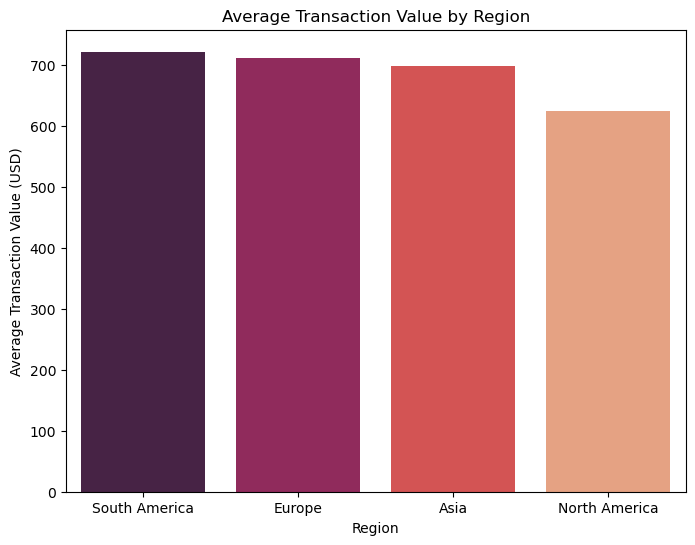

In [70]:
# 5. Average transaction value per region
region_avg_transaction = data.groupby("Region")["TotalValue"].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=region_avg_transaction.index, y=region_avg_transaction.values, palette="rocket")
plt.title("Average Transaction Value by Region")
plt.xlabel("Region")
plt.ylabel("Average Transaction Value (USD)")
plt.show()

In [78]:
# Business Insights
insights = [
    "1. The number of transactions steadily increased over time, indicating growing customer engagement.",
    "2. The top-selling products contribute significantly to the revenue, suggesting these should be prioritized in promotions.",
    "3. Product categories such as [Books] generate the highest revenue, highlighting their importance.",
    "4. Customers from [South America] dominate the user base, representing a key market for targeted campaigns.",
    "5. Regions like [South America] have higher average transaction values, suggesting potential upselling opportunities."]

In [80]:
for insight in insights:
    print(insight)

1. The number of transactions steadily increased over time, indicating growing customer engagement.
2. The top-selling products contribute significantly to the revenue, suggesting these should be prioritized in promotions.
3. Product categories such as [Books] generate the highest revenue, highlighting their importance.
4. Customers from [South America] dominate the user base, representing a key market for targeted campaigns.
5. Regions like [South America] have higher average transaction values, suggesting potential upselling opportunities.
